<center> <font size = 1> 2019 KHBM Summer School, OHBM Korea Chapter Program
    </font> </center>

<center> <font size = 4>
Mutivoxel-pattern analysis (MVPA) for whole brain
    </font> </center>

<br><br>

<center> August 17, 2019 </center>

<center> Jong-Hwan Lee, Juhyeon Lee, Hyun-Chul Kim </center>

 ## This notebook file is built to implement fully-connected neural networks
 ## based computational models to perform a input and output mapping (JH Lee, August 17, 2019).
 ## Reference
   * Python Machine Learning (https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning-second-edition)

In [1]:
# import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import scipy.io as sio


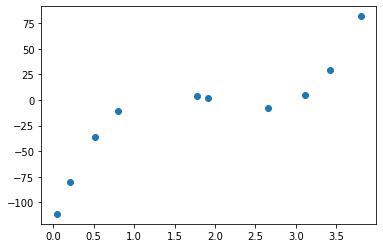

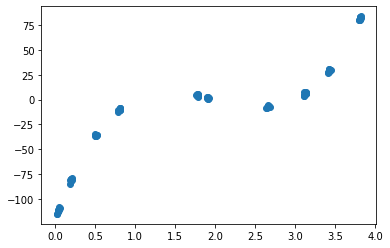

In [2]:
## Preparation of the data set
def quadratic_fn(x):
    y = -2*x* x + 4*x + 1
    return y

def linear_fn(x):
    y = 2 * x + 0.5
    return y

def cubic_fn(x):
    #coeff = np.random.randn(4)
    #y = np.empty(0)
    #for idx in range(4):
    #    y += coeff[idx]*np.power(x, idx)
    y = 20 * np.multiply(np.multiply(x - 1, x - 2), x-3)
    return y
    
    #y = coeff[0]*np.pow(x, 3) + coeff[1]*

#####################################
## generating training/validation set
#####################################
#x = 2 * np.random.rand(10)  # uniformly between 0 and 2
x = 4 * np.random.rand(10)  # uniformly between 0 and 2
#y = quadratic_fn(x) # y is a quadratic function of x
y = cubic_fn(x) # y is a cubic function of x

# plotting the quadratic relationship between x and y
plt.plot(x,y,'o')
plt.show()


data_x, data_y = np.empty(0), np.empty(0)
for xval, yval in zip(x, y):
    data_x = np.append(data_x, np.random.randn(10)*0.01 + xval)
    #data_y = np.append(data_y, np.random.randn(10)*1.0 + yval)
data_y = cubic_fn(data_x) + np.random.randn(data_x.shape[0])*1.0
data_x = data_x[:, np.newaxis]

plt.plot(data_x, data_y, 'o')
plt.show()

x_tr, x_val, y_tr, y_val = train_test_split(data_x, data_y, test_size=0.2)

######################
## generating test set
######################
x_ts = 4 * np.random.rand(100)  # uniformly between 0 and 2
x_ts = x_ts[:, np.newaxis]
#y_ts = quadratic_fn(x_ts) # y is a quadratic function of x
y_ts = cubic_fn(x_ts) # y is a quadratic function of x


In [3]:
# Or, load an existing dataset
matdata = sio.loadmat('sim_data.mat')
x_tr, y_tr = matdata['x_tr'], matdata['y_tr'].flatten()
x_val, y_val = matdata['x_val'], matdata['y_val'].flatten()
x_ts, y_ts = matdata['x_ts'], matdata['y_ts'].flatten()


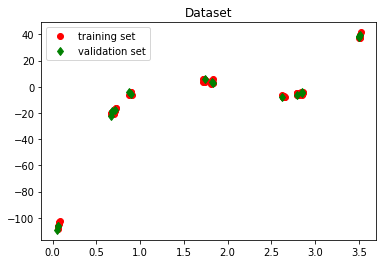

In [4]:
# plot the data set
#plt.plot(x_ts, y_ts, 'ys', label='test set')
plt.plot(x_tr, y_tr, 'ro', label='training set')
plt.plot(x_val, y_val, 'gd', label='validation set')
plt.title('Dataset')
plt.legend()
plt.show()


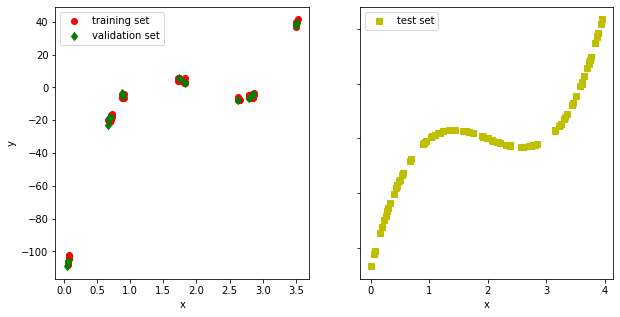

In [5]:
# plot the data set using subplots
f, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(x_tr, y_tr, 'ro', label='training set')
axs[0].plot(x_val, y_val, 'gd', label='validation set')
axs[0].set(xlabel='x', ylabel='y')
axs[0].legend()
axs[1].plot(x_ts, y_ts, 'ys', label='test set')
axs[1].set(xlabel='x', ylabel='y')
axs[1].legend()
for ax in axs.flat:
    ax.label_outer()
plt.show()



In [6]:
# linear regression model using TF
class TFlinear(object):
    def __init__(self, x_dim, learning_rate = 0.01):
        self.x_dim = x_dim
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        # build the model
        with self.g.as_default():
            self.build()
            self.init_op = tf.global_variables_initializer()
    
    def build(self):
        self.X = tf.placeholder(dtype=tf.float32, 
                    shape=(None, self.x_dim), name='x_input')
        self.y = tf.placeholder(dtype=tf.float32, 
                    shape=(None), name='y_output')
        print(self.X)
        print(self.y)
        w = tf.Variable(tf.truncated_normal(shape=(1,1), stddev=0.1), name='weight')
        b = tf.Variable(tf.ones(shape=(1))*0.1, name='bias')
        print(w)
        print(b)

        self.z_net = tf.squeeze(self.X*w + b, name='z_net')
        print(self.z_net)

        self.y_hat = self.z_net
        sqr_err = tf.square(self.y - self.y_hat, name='sqr_err')
        print(sqr_err)

        self.mse_cost = tf.reduce_mean(sqr_err, name='mse_cost')
        print(self.mse_cost)

        self.cost = self.mse_cost

        optimizer = tf.train.GradientDescentOptimizer(
            learning_rate = self.learning_rate, name='GradientDescent')

        self.train_op = optimizer.minimize(self.cost, name='train_op')


In [7]:
# two-layer neural network implementation using TF
class TF2layer(object):
    def __init__(self, x_dim, h_dim, l1param=0.001, l2param=0.00001, learning_rate = 0.01):
        self.x_dim = x_dim
        self.h_dim = h_dim
        self.l1param = l1param # L1-norm parameter
        self.l2param = l2param # L2-norm parameter
        self.learning_rate = learning_rate
        self.g = tf.Graph()
        # build the model
        with self.g.as_default():
            self.build()
            self.init_op = tf.global_variables_initializer()
    
    def build(self):
        self.X = tf.placeholder(dtype=tf.float32, 
                    shape=(None, self.x_dim), name='x_input')
        self.y = tf.placeholder(dtype=tf.float32, 
                    shape=(None), name='y_output')
        print(self.X)
        print(self.y)
        self.w1 = tf.Variable(tf.truncated_normal(shape=(self.x_dim, self.h_dim), stddev=0.1), name='weight1')
        self.b1 = tf.Variable(tf.ones(shape=(self.h_dim))*0.1, name='bias1')
        print(self.w1)
        print(self.b1)

        self.z_net = tf.squeeze(tf.matmul(self.X, self.w1) + self.b1, name='z_net')
        print(self.z_net)

        #self.h = self.z_net
        self.h = tf.tanh(self.z_net)

        self.w2 = tf.Variable(tf.truncated_normal(shape=(self.h_dim, 1), stddev=0.1), name='weight2')
        self.b2 = tf.Variable(tf.ones(shape=(1))*0.1, name='bias2')
        print(self.w2)
        print(self.b2)

        self.y_hat = tf.squeeze(tf.matmul(self.h, self.w2) + self.b2, name='y_hat')
        print(self.y_hat)

        sqr_err = tf.square(self.y - self.y_hat, name='sqr_err')
        print(sqr_err)

        self.l1norm = tf.multiply(self.l1param, tf.add(tf.reduce_sum(tf.abs(self.w1)), tf.reduce_sum(tf.abs(self.w2))))
        self.l2norm = tf.multiply(self.l2param, tf.add(tf.reduce_sum(tf.pow(self.w1, 2)), tf.reduce_sum(tf.pow(self.w2, 2))))

        self.mse_cost = tf.reduce_mean(sqr_err, name='mse_cost')
        print(self.mse_cost)

        self.cost = self.mse_cost

        optimizer = tf.train.GradientDescentOptimizer(
            learning_rate = self.learning_rate, name='GradientDescent')

        self.train_op = optimizer.minimize(self.mse_cost, name='train_op')


In [8]:
# two-layer neural network with L1/L2-regularization implementation using TF
class TF2layer_l1l2(object):
    def __init__(self, x_dim, h_dim, alpha_param=1.0, l1param=0.001, l2param=0.00001, learning_rate = 0.01):
        self.x_dim = x_dim # number of input nodes
        self.h_dim = h_dim # number of hidden nodes
        self.alpha_param = alpha_param # ratio of mse in the cost
        self.l1param = l1param # L1-norm parameter
        self.l2param = l2param # L2-norm parameter
        self.learning_rate = learning_rate # learning rate for optimizer
        self.g = tf.Graph()
        # build the model
        with self.g.as_default():
            self.build()
            self.init_op = tf.global_variables_initializer()
    
    def build(self):
        self.X = tf.placeholder(dtype=tf.float32, 
                    shape=(None, self.x_dim), name='x_input')
        self.y = tf.placeholder(dtype=tf.float32, 
                    shape=(None), name='y_output')
        print(self.X)
        print(self.y)
        self.w1 = tf.Variable(tf.truncated_normal(shape=(self.x_dim, self.h_dim), stddev=0.1), name='weight1')
        self.b1 = tf.Variable(tf.ones(shape=(self.h_dim))*0.1, name='bias1')
        print(self.w1)
        print(self.b1)

        self.z_net = tf.squeeze(tf.matmul(self.X, self.w1) + self.b1, name='z_net')
        print(self.z_net)

        #self.h = self.z_net
        self.h = tf.tanh(self.z_net)

        self.w2 = tf.Variable(tf.truncated_normal(shape=(self.h_dim, 1), stddev=0.1), name='weight2')
        self.b2 = tf.Variable(tf.ones(shape=(1))*0.1, name='bias2')
        print(self.w2)
        print(self.b2)

        self.y_hat = tf.squeeze(tf.matmul(self.h, self.w2) + self.b2, name='y_hat')
        print(self.y_hat)

        sqr_err = tf.square(self.y - self.y_hat, name='sqr_err')
        print(sqr_err)

        self.mse_cost = tf.reduce_mean(sqr_err, name='mse_cost')
        print(self.mse_cost)

        self.l1norm = tf.add(tf.reduce_sum(tf.abs(self.w1)), tf.reduce_sum(tf.abs(self.w2)))
        self.l2norm = tf.add(tf.reduce_sum(tf.pow(self.w1, 2)), tf.reduce_sum(tf.pow(self.w2, 2)))

        # L1- and L2-norm regularization (i.e., elastic net)
        self.cost = tf.multiply(self.alpha_param, self.mse_cost) + \
                        tf.multiply(self.l1param, self.l1norm) + \
                            tf.multiply(self.l2param, self.l2norm)
        #
        # L1-norm regularization (i.e., LASSO)
        #self.cost = self.mse_cost + self.l1param * tf.reduce_mean(tf.abs(self.w1)) 
        # L2-norm regularization (i.e., ridge regression)
        #self.cost = self.mse_cost + self.l2param * tf.reduce_mean(tf.pow(self.w1, 2))

        optimizer = tf.train.GradientDescentOptimizer(
            learning_rate = self.learning_rate, name='GradientDescent')

        self.train_op = optimizer.minimize(self.cost, name='train_op')


In [9]:
# This function is to train the linear model
def train_model_linear(sess, model, X_train, y_train, n_epochs=100):
    sess.run(model.init_op)
    tr_cost = []
    for i in range(n_epochs):
        # This is for linear model for now
        _, cost = sess.run([model.train_op, model.cost], feed_dict={model.X: X_train, model.y: y_train})
        tr_cost.append(cost),

        if not i % 100:
            print('Epoch {:3d}: {:.4f}'.format(i, cost))
    return tr_cost # for one layer (linear) model


In [10]:
# This function is to train the two-layer model
def train_model_twolayer(sess, model, X_train, y_train, n_epochs=100):
    sess.run(model.init_op)
    tr_cost, tr_mse_cost, tr_l1norm, tr_l2norm, = [], [], [], []
    for i in range(n_epochs):
        # The below is for two-layer model
        _, mse_cost, l1norm, l2norm, cost = sess.run([model.train_op, model.mse_cost, model.l1norm
                    , model.l2norm, model.cost], feed_dict={model.X: X_train, model.y: y_train})
        tr_cost.append(cost), tr_mse_cost.append(mse_cost), tr_l1norm.append(l1norm), tr_l2norm.append(l2norm)

        if not i % 100:
            print('Epoch {:3d}: {:.4f}'.format(i, cost))
    return tr_cost, tr_mse_cost, tr_l1norm, tr_l2norm # for two layer model


In [11]:
# function to return the predicted output 
def predict_model(sess, model, X_test, y_test):
    y_pred = sess.run(model.y_hat, feed_dict={model.X: X_test})
    mse_err = np.mean(np.square(y_test - y_pred))
    return y_pred, mse_err



 # From now on, let's create an instance of the model,
 # train the model, and get the training costs.

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_output:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_err:0", dtype=float32)
Tensor("mse_cost:0", shape=(), dtype=float32)
Epoch   0: 1173.5392
Epoch 100: 949.1437
Epoch 200: 805.0450
Epoch 300: 712.3210
Epoch 400: 652.6554
Epoch 500: 614.2621
Epoch 600: 589.5571
Epoch 700: 573.6600
Epoch 800: 563.4305
Epoch 900: 556.8481
Epoch 1000: 552.6125
Epoch 1100: 549.8871
Epoch 1200: 548.1334
Epoch 1300: 547.0048
Epoch 1400: 546.2787
Epoch 1500: 545.8113
Epoch 1600: 545.5107
Epoch 1700: 545.3172
Epoch 1800: 545.1927
Epoch 1900: 545.1126
Epoch 2000: 545.0610
Epoch 2100: 545.0279
Epoch 2200: 545.0065
Epoch 2300: 544.9928
Epoch 2400: 544.9839
Epoch 2500: 544.9782
Epoch 2600: 544.9746
Epoch 2700: 544.9723
Epoch 2800: 544.9707
Epoch 2900: 544.9697
Epoch 3000: 544.9691
Epoch 3100: 544.9687
Epoch 3200: 544.9684
Epoch 330

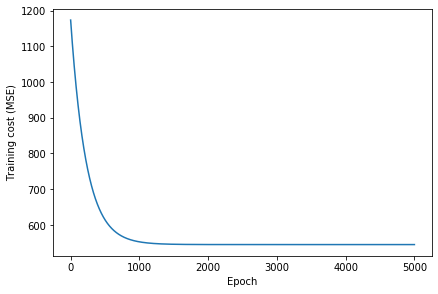

In [12]:
# For one-layer: train and test the model
# define the model
lrmodel = TFlinear(x_dim=x_tr.shape[1], learning_rate=0.005)
sess = tf.Session(graph=lrmodel.g)
# train the model
tr_costs = train_model_linear(sess, lrmodel, x_tr, y_tr, n_epochs=5000) 

# visualize the training costs from linear model
plt.plot(range(1,len(tr_costs)+1), tr_costs)
plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Training cost (MSE)')
plt.show()

# test the trained model
model = lrmodel
y_tr_pred, mse_err_tr = predict_model(sess, model, x_tr, y_tr)
y_ts_pred, mse_err_ts = predict_model(sess, model, x_ts, y_ts)

print("training mse: {:.4f}, testing mse: {:.4f}".format(mse_err_tr, mse_err_ts))


Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_output:0", dtype=float32)
<tf.Variable 'weight1:0' shape=(1, 5000) dtype=float32_ref>
<tf.Variable 'bias1:0' shape=(5000,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
<tf.Variable 'weight2:0' shape=(5000, 1) dtype=float32_ref>
<tf.Variable 'bias2:0' shape=(1,) dtype=float32_ref>
Tensor("y_hat:0", dtype=float32)
Tensor("sqr_err:0", dtype=float32)
Tensor("mse_cost:0", shape=(), dtype=float32)
Epoch   0: 1187.9708
Epoch 100: 546.8428
Epoch 200: 546.6566
Epoch 300: 546.4248
Epoch 400: 546.0093
Epoch 500: 542.6186
Epoch 600: 253.8757
Epoch 700: 216.7785
Epoch 800: 141.1425
Epoch 900: 112.1599
Epoch 1000: 104.6222
Epoch 1100: 107.0067
Epoch 1200: 100.6548
Epoch 1300: 88.9121
Epoch 1400: 74.7570
Epoch 1500: 63.0482
Epoch 1600: 54.9814
Epoch 1700: 49.6924
Epoch 1800: 46.1325
Epoch 1900: 43.5512
Epoch 2000: 41.4698
Epoch 2100: 39.5726
Epoch 2200: 37.7170
Epoch 2300: 35.8729
Epoch 2400: 34.0541
Epoch 2500: 32.2859
Epoch 2600: 30.

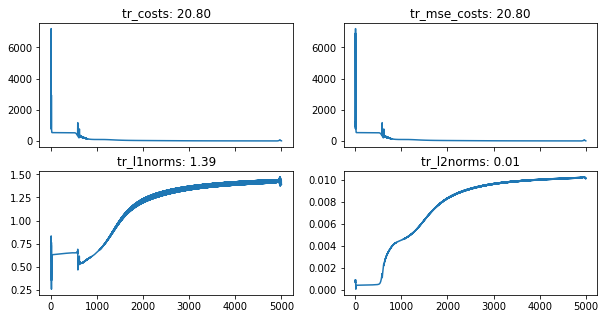

In [13]:
# For two-layer without regularization: train and test the model
# define the model
twoLmodel = TF2layer(x_dim=x_tr.shape[1], h_dim=5000, learning_rate=0.005) # for tanh
##twoLmodel = TF2layer(x_dim=x_tr.shape[1], h_dim=100, learning_rate=0.001) # for linear
## h_dim: 2 (underfitting; less capacity net), 10 (slightly underfitting), 
##   100 (right model), 1000 (underfitting; too much capacity given net capacity)
## 5000 ()
sess = tf.Session(graph=twoLmodel.g)
# train the model
tr_costs, tr_mse_costs, tr_l1norms, tr_l2norms = train_model_twolayer(sess, twoLmodel, x_tr, y_tr, n_epochs=5000) 

# visualize the cost, mse_cost, l1norm, and l2norm
f, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 5))
axs[0,0].plot(tr_costs)
axs[0,0].set_title('tr_costs: {:.2f}'.format(tr_costs[-1]))
axs[0,1].plot(tr_mse_costs)
axs[0,1].set_title('tr_mse_costs: {:.2f}'.format(tr_mse_costs[-1]))
axs[1,0].plot(tr_l1norms)
axs[1,0].set_title('tr_l1norms: {:.2f}'.format(tr_l1norms[-1]))
axs[1,1].plot(tr_l2norms)
axs[1,1].set_title('tr_l2norms: {:.2f}'.format(tr_l2norms[-1]))
plt.show()

# test the trained model
model = twoLmodel
y_tr_pred, mse_err_tr = predict_model(sess, model, x_tr, y_tr)
y_ts_pred, mse_err_ts = predict_model(sess, model, x_ts, y_ts)

print("training mse: {:.4f}, testing mse: {:.4f}".format(mse_err_tr, mse_err_ts))


W0817 02:42:59.292883 4725753280 deprecation.py:323] From /anaconda3/envs/tf_py36/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_output:0", dtype=float32)
<tf.Variable 'weight1:0' shape=(1, 5000) dtype=float32_ref>
<tf.Variable 'bias1:0' shape=(5000,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
<tf.Variable 'weight2:0' shape=(5000, 1) dtype=float32_ref>
<tf.Variable 'bias2:0' shape=(1,) dtype=float32_ref>
Tensor("y_hat:0", dtype=float32)
Tensor("sqr_err:0", dtype=float32)
Tensor("mse_cost:0", shape=(), dtype=float32)
Epoch   0: 1268.8190
Epoch 100: 610.5557
Epoch 200: 598.4918
Epoch 300: 486.1771
Epoch 400: 368.3956
Epoch 500: 296.3134
Epoch 600: 253.4422
Epoch 700: 234.1335
E

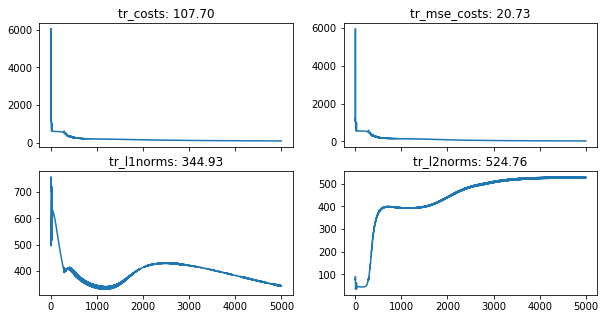

In [14]:
# For two-layer with L1/L2-regularization: train and test the model
# define the model
twoLmodel_l1l2 = TF2layer_l1l2(x_dim=x_tr.shape[1], h_dim=5000, alpha_param=1.0, l1param=0.10, l2param=0.10, learning_rate=0.005) 
sess = tf.Session(graph=twoLmodel_l1l2.g)
# train the model
tr_costs, tr_mse_costs, tr_l1norms, tr_l2norms = train_model_twolayer(sess, twoLmodel_l1l2, x_tr, y_tr, n_epochs=5000) 

# visualize the cost, mse_cost, l1norm, and l2norm
f, axs = plt.subplots(2, 2, sharex=True, figsize=(10, 5))
axs[0,0].plot(tr_costs)
axs[0,0].set_title('tr_costs: {:.2f}'.format(tr_costs[-1]))
axs[0,1].plot(tr_mse_costs)
axs[0,1].set_title('tr_mse_costs: {:.2f}'.format(tr_mse_costs[-1]))
axs[1,0].plot(tr_l1norms)
axs[1,0].set_title('tr_l1norms: {:.2f}'.format(tr_l1norms[-1]))
axs[1,1].plot(tr_l2norms)
axs[1,1].set_title('tr_l2norms: {:.2f}'.format(tr_l2norms[-1]))
plt.show()

# test the trained model
model = twoLmodel_l1l2
y_tr_pred, mse_err_tr = predict_model(sess, model, x_tr, y_tr)
y_ts_pred, mse_err_ts = predict_model(sess, model, x_ts, y_ts)

print("training mse: {:.4f}, testing mse: {:.4f}".format(mse_err_tr, mse_err_ts))


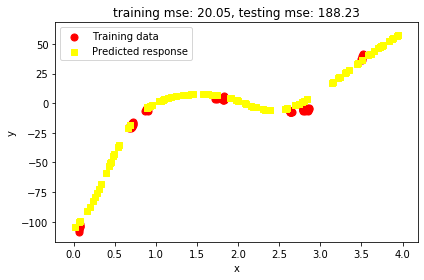

In [15]:
# plot the training data and fitted response for the training data
plt.scatter(x_tr, y_tr, color='red', marker='o', s=50, label='Training data')
plt.scatter(x_ts, y_ts_pred, color='yellow', marker='s', 
        label='Predicted response')
plt.xlabel('x')
plt.ylabel('y')
plt.title("training mse: {:.2f}, testing mse: {:.2f}".format(mse_err_tr, mse_err_ts))
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
# Hoyer's sparseness
def hsp(data_vec):
    data_vec_dim = np.max(data_vec.shape)
    denom = np.sqrt(data_vec_dim) - 1
    numer = np.sqrt(data_vec_dim) - \
        np.sum(np.abs(data_vec))/np.sqrt(np.sum(np.square(data_vec)))
    hsp_val = np.divide(numer, denom)
    return hsp_val


In [17]:
# Non-zero ratio (NZR)
def nzr(data_vec, epsilon=1e-2):
    # since the scale matters, first, normalize, then evaluate the non-zero ratio
    data_vec_norm = np.divide(data_vec, np.sqrt(np.sum(np.square(data_vec))))
    nzr_val = np.sum(np.abs(data_vec_norm) > epsilon) / np.max(data_vec.shape)
    return nzr_val


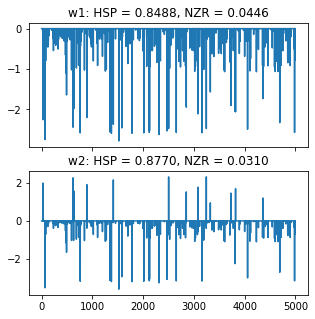

Hoyer sparseness of w1: 0.8488, w2: 0.8770
Non-zero ratio (NZR) of w1: 0.0446, w2: 0.0310


In [18]:
# plot the weights
w1 = sess.run(model.w1)
w1 = w1.transpose()
w2 = sess.run(model.w2)
f, axs = plt.subplots(2,1, sharex=True, figsize=(5,5))
axs[0].plot(w1)
axs[0].set_title('w1: HSP = {:.4f}, NZR = {:.4f}'.format(hsp(w1), nzr(w1)))
axs[1].plot(w2)
axs[1].set_title('w2: HSP = {:.4f}, NZR = {:.4f}'.format(hsp(w2), nzr(w2)))
#
#f, axs = plt.subplots(1,2, figsize=(10,3))
#axs[0].plot(w1)
#axs[0].set_title('w1: HSP = {:.4f}, NZR = {:.4f}'.format(hsp(w1), nzr(w1)))
#axs[1].plot(w2)
#axs[1].set_title('w2: HSP = {:.4f}, NZR = {:.4f}'.format(hsp(w2), nzr(w2)))
#
plt.show()
#
print('Hoyer sparseness of w1: {:.4f}, w2: {:.4f}'.format(hsp(w1), hsp(w2)))
print('Non-zero ratio (NZR) of w1: {:.4f}, w2: {:.4f}'.format(nzr(w1), nzr(w2)))
